# Modelling the James Webb Space Telescope's Optical System
### By: Jake Wagoner

### The James Webb Space Telescope (JWST) is the most powerful space telescope ever launched by humanity.

The purpose of the James Webb is to detect and observe some of the oldest stellar bodies in the universe, going back to the creation of the universe. It does this through the use of infrared wavelength sensors.

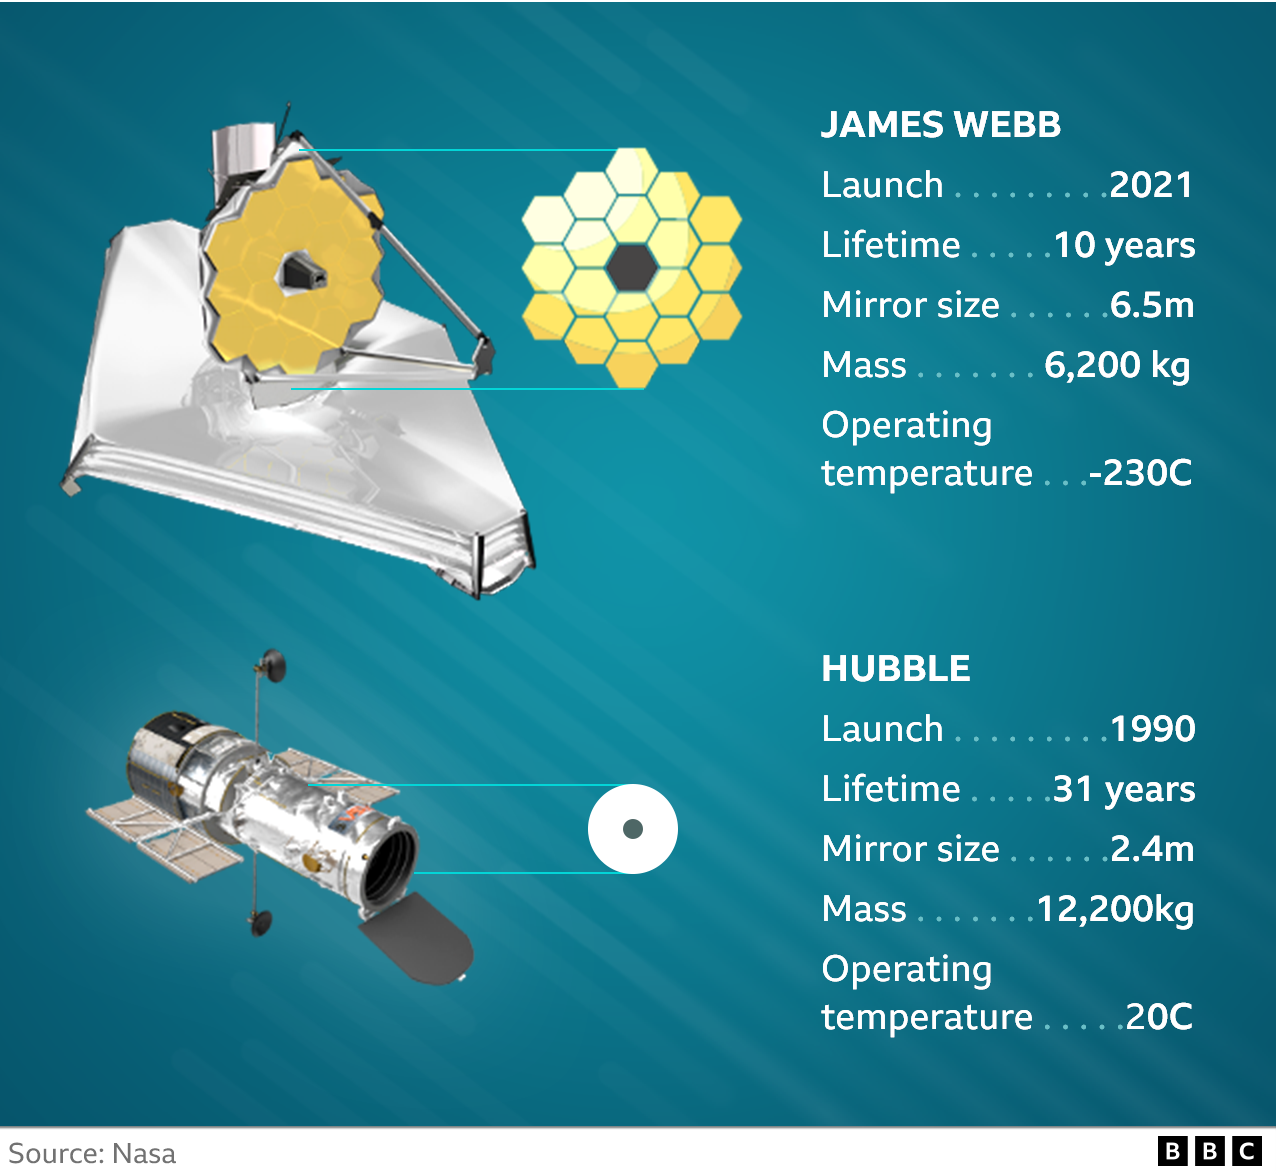

#### The James Webb is comprised of four mirrors, the primary, secondary, tertiary, and fine steering mirror.
The primary mirror is made up of 18 hexagonal gold-plated beryllium panels, which form a 21 foot diameter mirror when assembled. This is the gold mirror seen above.

## Why is the James Webb Space Telescope important?

The JWST is important because it uses Near-IR sensors to detect *red shifted* light. The light reaching Earth from very distant stellar bodies has had it's wavelength enlonged due to the Doppler Effect. This means it's not even visible to the human eye!

Also, infrared wavelength light experiences less scattering when travelling through interstellar dust, so the data we get form infrared sensors is generally more accurate compared to visible light.

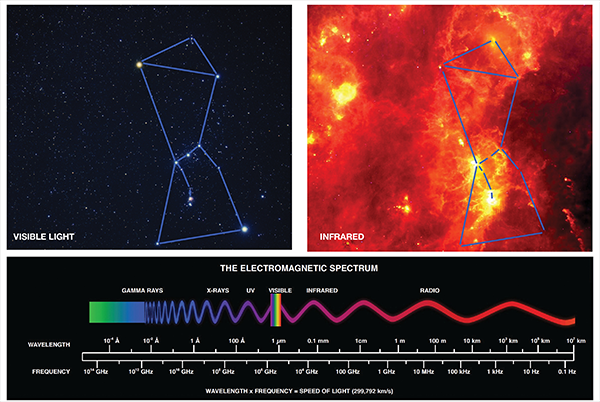

Source: https://www.sofia.usra.edu/multimedia/about-sofia/sofia-mobile-information/infrared-astronomy-more-our-eyes-can-see

# Two Dimensional James Webb Space Telescope model (to scale)

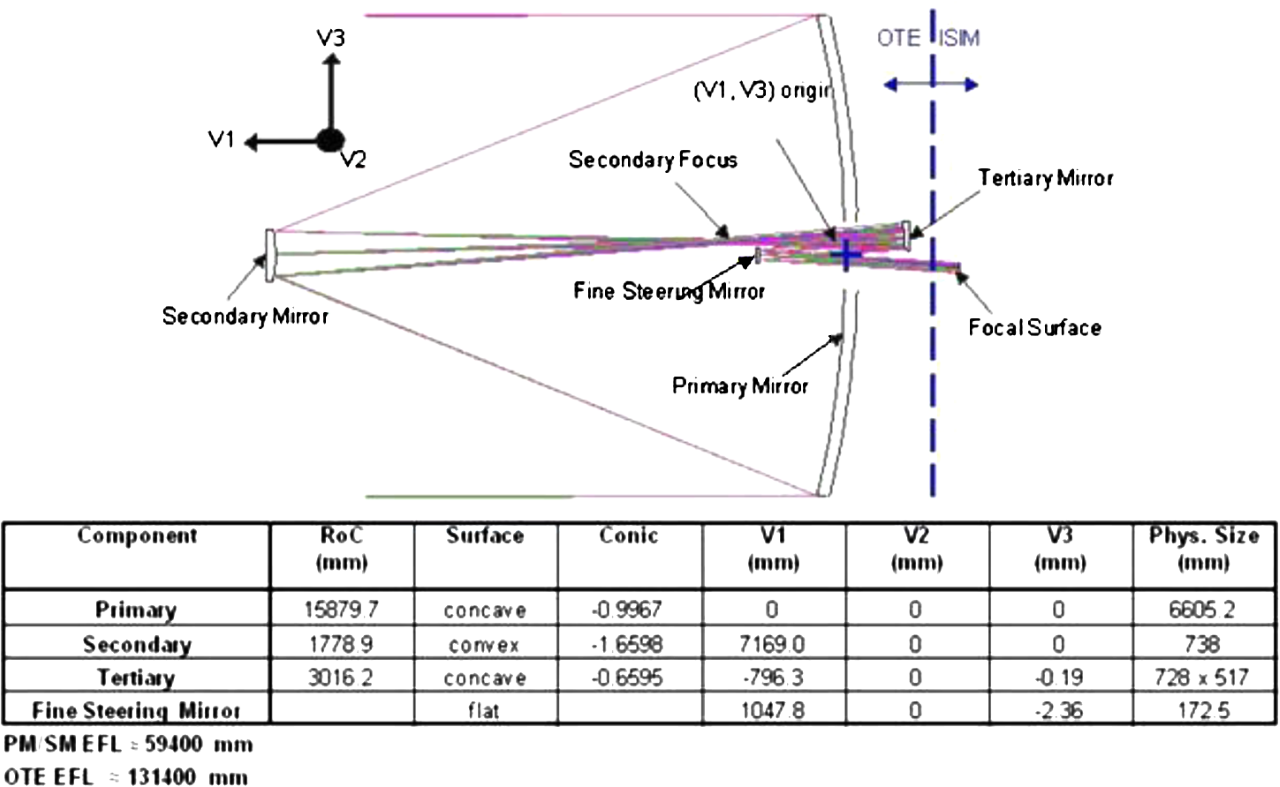

Paul A. Lightsey, Charles B. Atkinson, Mark C. Clampin, Lee D. Feinberg. *James Webb Space Telescope: large deployable cryogenic telescope in space*. Optical Engineering, 51(1), 011003 (2012). https://doi.org/10.1117/1.OE.51.1.011003

### Goal: Accurately model the JWST's optical system for objects within the observation range

In [1]:
%matplotlib widget

In [2]:
isdark = True

In [3]:
from rayoptics.environment import *

In [4]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [5]:
opm = OpticalModel()
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

In [6]:
pupil_diameter = 80.
pupil_radius = pupil_diameter/2
osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=pupil_diameter)

# single view
osp.field_of_view = FieldSpec(osp, key=['object', 'angle'], flds=[0.])

# wavelength: 5000nm (infrared)
osp.spectral_region = WvlSpec([(5000.0, 1.0)], ref_wl=0)

In [7]:
sm.gaps[0].thi=1e+10

In [8]:
tertiary_mirror_perturb = srf.DecenterData('dec and return')
fs_mirror_perturb = srf.DecenterData('dec and return')

### Add optical surfaces

All distance measurements are in decimeters for ease of programming. All images in this segment sourced from nasa.gov

#### Primary Mirror: 
- 18 segemented sections with a hole in the center for light to pass through.
- Concave elliptical paraboloid conic mirror.
- Radius of curvature: 158.789 decimeters (15.789 meters)
- Conic Constant: -0.9967
- Coordinates: (0, 0, 0)

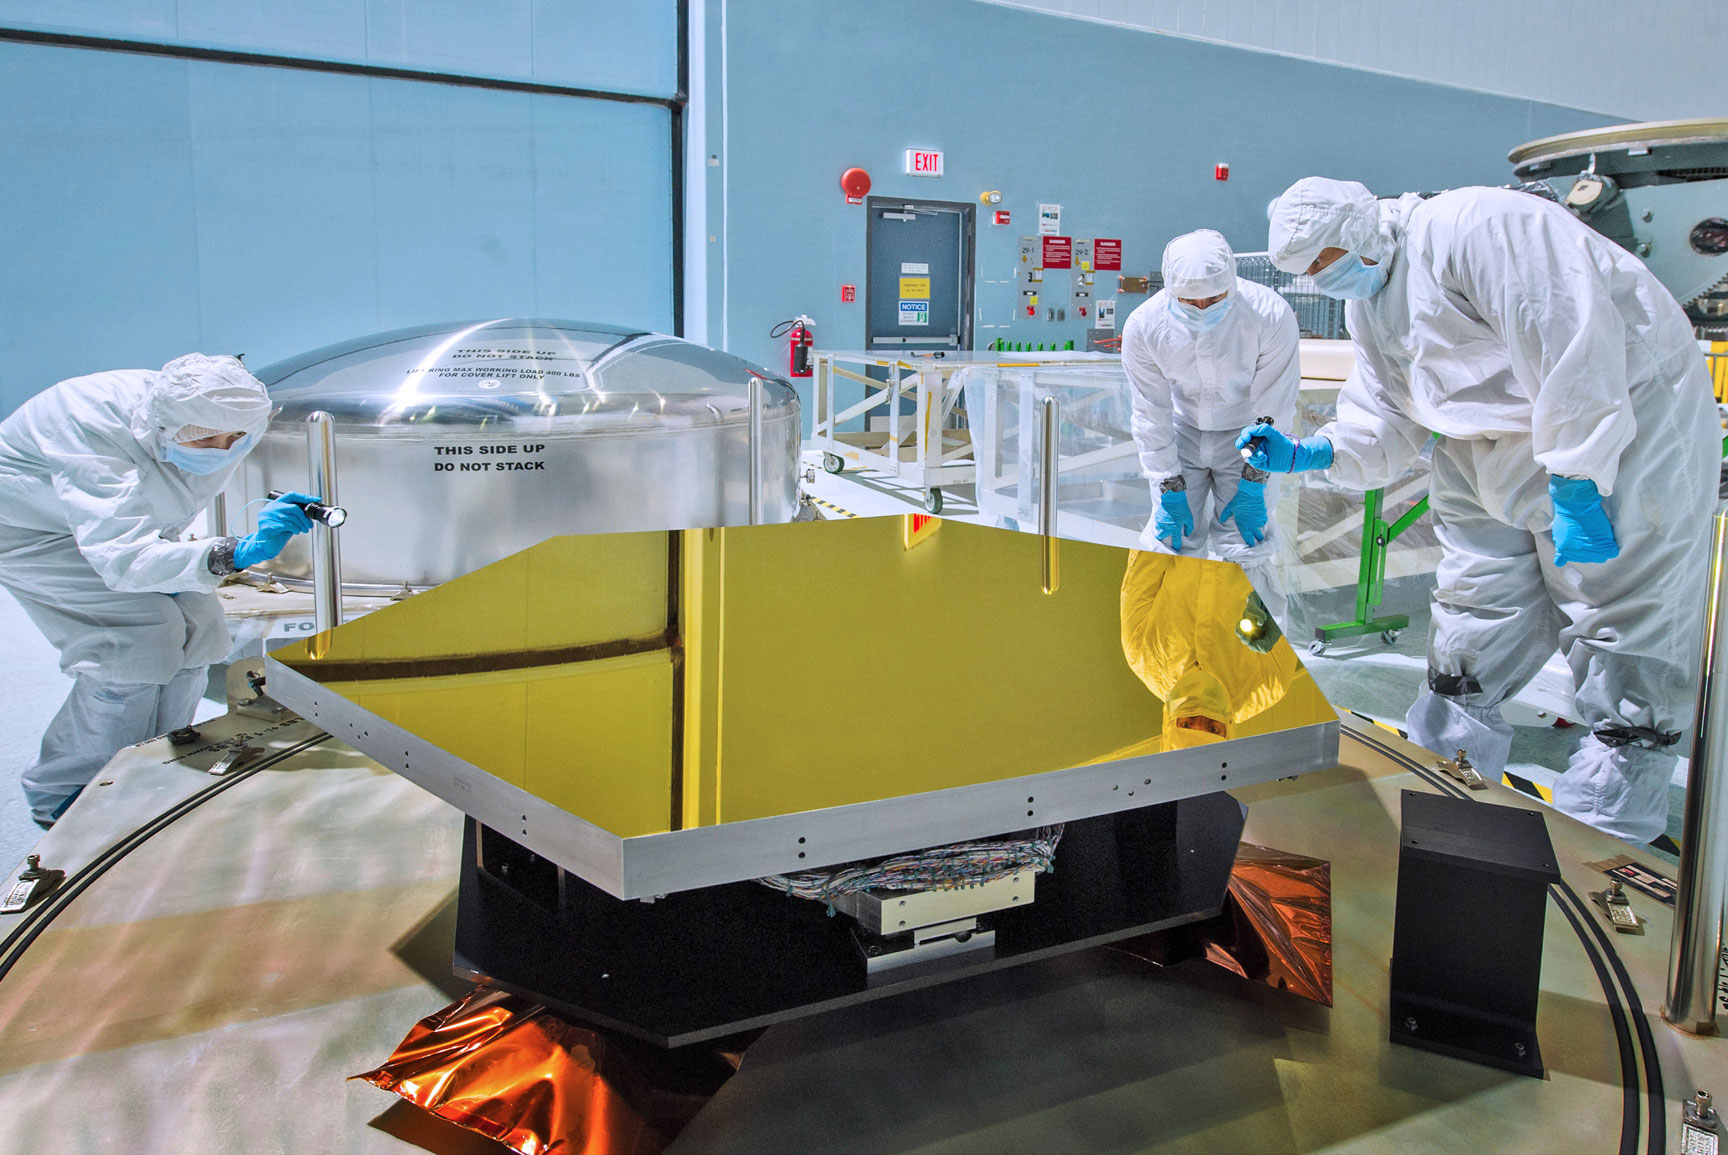

In [9]:
opm.add_mirror(lbl='PRIMARY', r=-159.105, profile=Conic, cc=-0.9967, t=-71.69)

#### Secondary Mirror:
- Convex hyperbolic conic mirror.
- Radius of curvature: 17.789 decimeters (1.7789 meters)
- Conic Constant: 1.6598
- Coordinates: (-71.69, 0, 0)

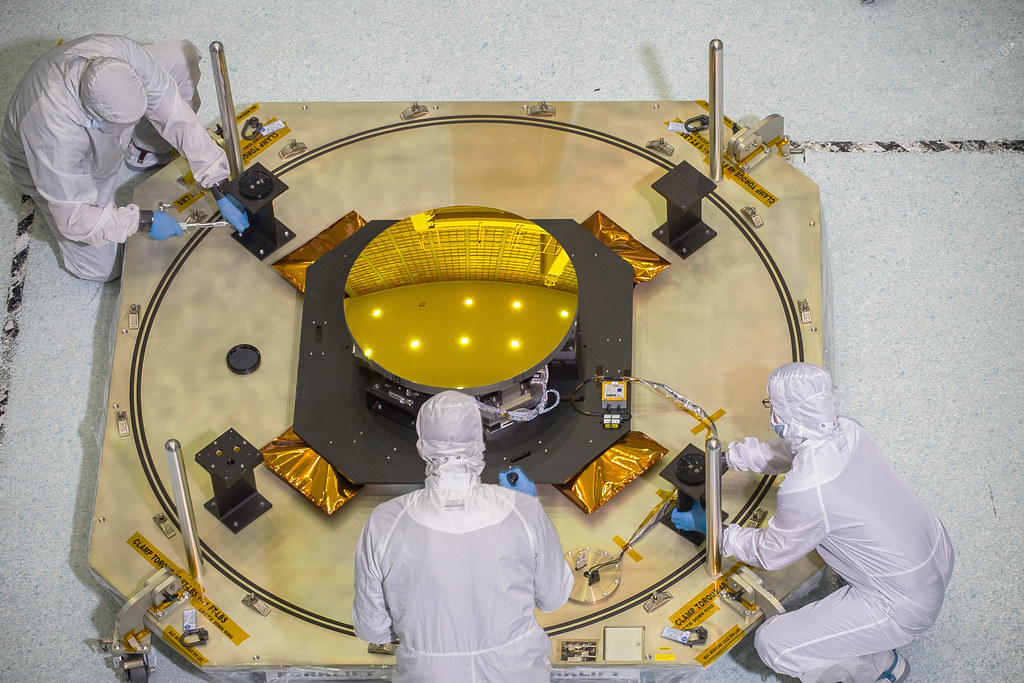

In [10]:
opm.add_mirror(lbl='SECONDARY', r=-17.789, profile=Conic, cc=-1.6598, t=79.653)

#### Tertiary Mirror:
- Concave elliptical conic mirror.
- Radius of curvature: 30.162 decimeters (3.0162 meters)
- Conic Constant: -0.6595
- Coordinates: (7.963, 0, -0.0019)

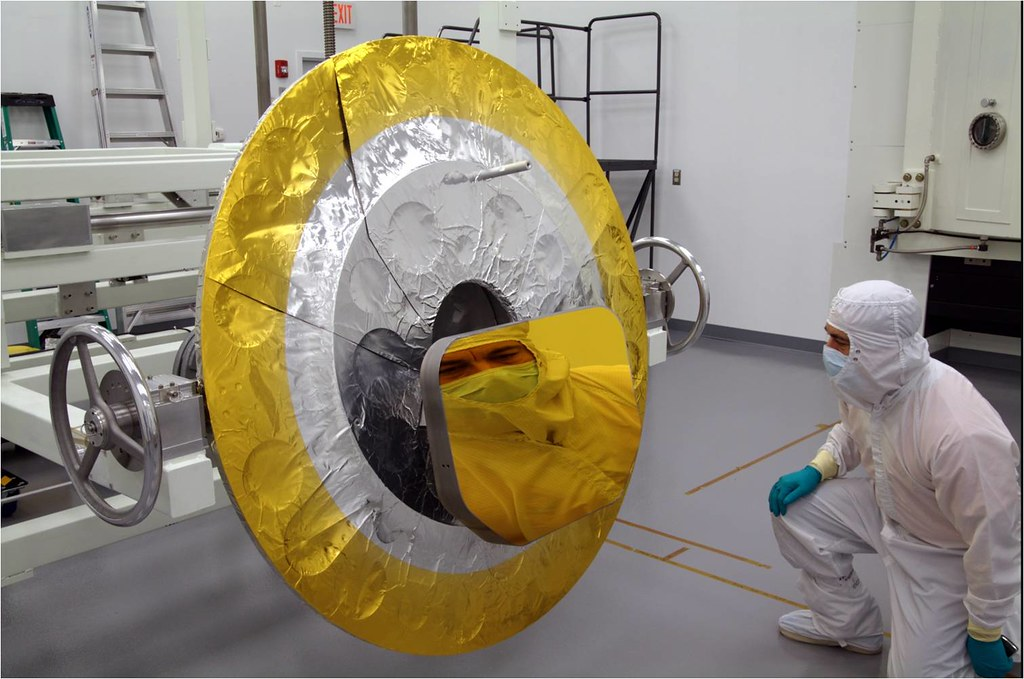

In [11]:
opm.add_mirror(lbl='TERTIARY', r=-30.162, profile=Conic, cc=-0.6595, t=-18.441, decenter=tertiary_mirror_perturb)

##### Apply tertiary mirror decenter
Calibrations done here

In [12]:
tertiary_mirror_perturb.euler[0] = -1.1
tertiary_mirror_perturb.dec[1] = -1.5

#### Fine Steering Mirror:
- Flat mirror.
- Radius of curvature: 0.0 decimeters (0.0 meters)
- Conic Constant: 0.00
- Coordinates: (1.0478, 0, 0.0236)

In [13]:
opm.add_mirror(lbl='FINE STEERING', profile=Conic, cc=0.00, t=30., decenter=fs_mirror_perturb)

##### Apply fine steering mirror decenter
Calibrations done here

In [14]:
fs_mirror_perturb.euler[0] += 0



#### Update Model

In [15]:
opm.update_model()

In [16]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1      0.0000
PRIMARY:    -0.006285     -71.6900       air    reflect -1      40.000
SECONDARY:    -0.056215      79.6530       air    reflect  1      3.9791
TERTIARY:    -0.033154     -18.4410       air    reflect -1      2.2807
FINE STEERING:     0.000000      30.0000       air    reflect  1      2.0489
  Img:     0.000000      0.00000                       1      4.1049


In [17]:
sm.list_sg()

               c               mode              type          y       alpha
                       t           medium
  Obj:      0.00000                 
                 1.00000e+10          air
PRIMARY:  -0.00628516          reflect
                    -71.6900          air
SECONDARY:   -0.0562145          reflect
                     79.6530          air
TERTIARY:   -0.0331543          reflect     dec and return    -1.5000    -1.1000
                    -18.4410          air
FINE STEERING:      0.00000          reflect     dec and return     0.0000     0.0000
                     30.0000          air
  Img:      0.00000                 


## The computer generated 2D model

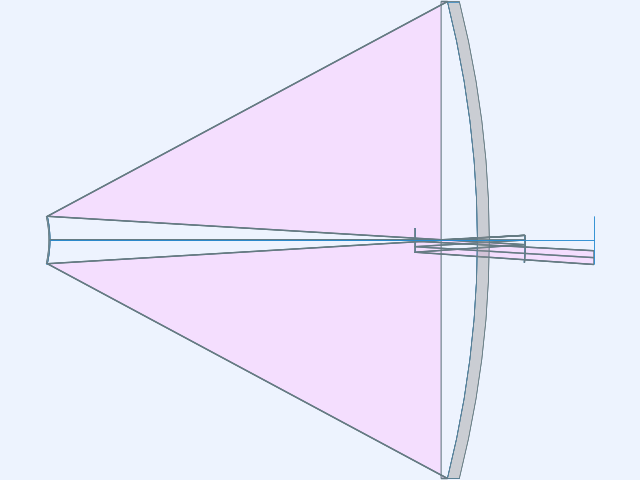

In [18]:
plt.ion()
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

### Data for Testing and Calibration Purposes

In [19]:
s3=sm.ifcs[3]
print(s3)

Surface(lbl='TERTIARY', profile=Conic(c=-0.03315430011272462, cc=-0.6595), interact_mode='reflect')


In [20]:
print(s3.decenter)

'dec and return': Decenter: array([ 0. , -1.5,  0. ]), Tilt: array([-1.1,  0. ,  0. ])


In [21]:
print(tertiary_mirror_perturb)

'dec and return': Decenter: array([ 0. , -1.5,  0. ]), Tilt: array([-1.1,  0. ,  0. ])


In [22]:
sm.list_gaps()

0 Gap(t=10000000000.0, medium=Air())
1 Gap(t=-71.69, medium=Air())
2 Gap(t=79.653, medium=Air())
3 Gap(t=-18.441, medium=Air())
4 Gap(t=30.0, medium=Air())


In [23]:
sm.list_decenters()

              thi    medium/mode          type          y       alpha
    0:  1.00000e+10          air
    1:     -71.6900          air
    2:      79.6530          air
    3:                   reflect  dec and return    -1.5000    -1.1000
    3:     -18.4410          air
    4:                   reflect  dec and return     0.0000     0.0000
    4:      30.0000          air
    5:                     dummy


In [24]:
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1 Surface(lbl='PRIMARY', profile=Conic(c=-0.006285157600326829, cc=-0.9967), interact_mode='reflect')
2 Surface(lbl='SECONDARY', profile=Conic(c=-0.056214514587666534, cc=-1.6598), interact_mode='reflect')
3 Surface(lbl='TERTIARY', profile=Conic(c=-0.03315430011272462, cc=-0.6595), interact_mode='reflect')
4 Surface(lbl='FINE STEERING', profile=Conic(c=0.0, cc=0.0), interact_mode='reflect')
5 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')


In [25]:
print(sm.gbl_tfrms)

[(array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), array([ 0.e+00,  0.e+00, -1.e+10])), (array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), array([0., 0., 0.])), (array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), array([  0.  ,   0.  , -71.69])), (array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.99981571, -0.01919744],
       [ 0.        ,  0.01919744,  0.99981571]]), array([ 0.   , -1.5  ,  7.963])), (array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00, -4.03211301e-19],
       [ 0.00000000e+00, -4.03211301e-19,  1.00000000e+00]]), array([ 0.00000000e+00, -2.22044605e-16, -1.04780000e+01])), (array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00, -4.03211301e-19],
       [ 0.00000000e+00, -4.03211301e-19,  1.00000000e+00]]), array([ 0.00000000e+00, -2.34140944e-16,  1.95220000e+01]))]


### First order data

In [26]:
pm.first_order_data()

efl                3239
ffl            1.41e+05
pp1           1.443e+05
bfl               -74.6
ppk                3313
f/#               40.48
m            -3.239e-07
red          -3.088e+06
obj_dist          1e+10
obj_ang               1
enp_dist             -0
enp_radius           40
na obj            4e-09
n obj                 1
img_dist          -74.6
img_ht            56.53
exp_dist         -104.8
exp_radius       0.9186
na img         -0.01235
n img                 1
optical invariant       0.6982


### Accuracy of the Model

#### Aberration:         the failure of rays to converge at one focus because of limitations or defects in a lens or mirror.
This means the image will be blurry and defocused.
The ideal optical system has no aberrations, so every ray focuses on a 0-size point.

#### Spherical Aberration:
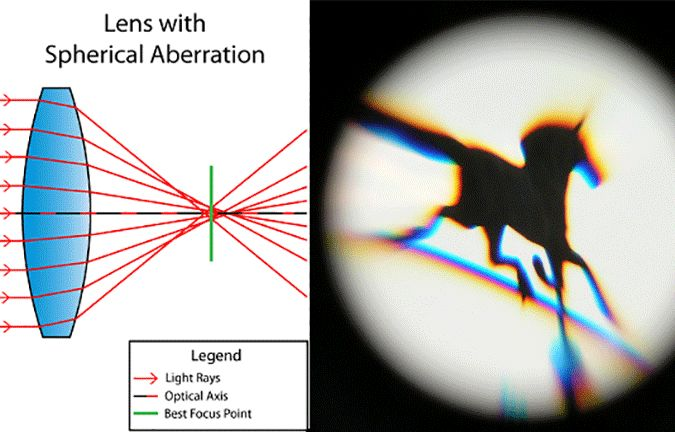

Source: https://www.allaboutvision.com/resources/human-interest/spherical-aberration/

#### Coma (Comatic Aberration):  an aberration resulting from a variance in magnification depending on the ray height at the lens

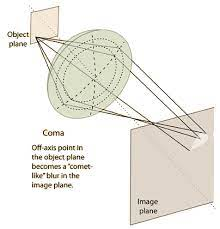
Source: http://hyperphysics.phy-astr.gsu.edu/hbase/geoopt/coma.html

#### Astigmatism (Astigmatic Aberration): astigmatic aberrations cause the ideal circular point image to blur into a diffuse circle, elliptical patch, or line, depending upon the location of the focal plane

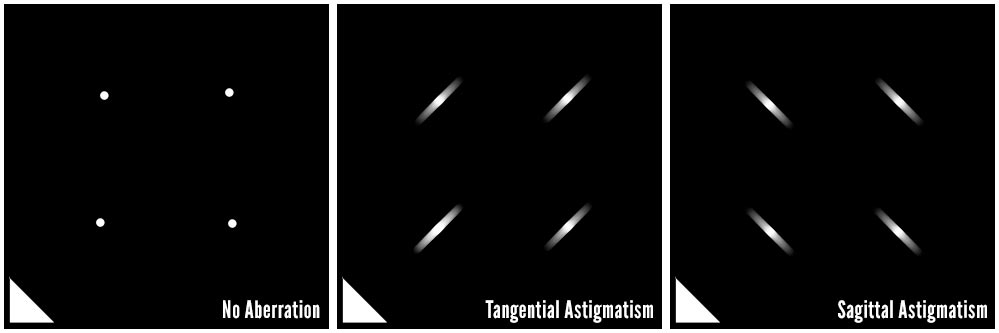
Source: https://www.lonelyspeck.com/a-practical-guide-to-lens-aberrations-and-the-lonely-speck-aberration-test/

### Spot Diagram for the James Webb Space Telescope Model

A spot diagram is used to determine the quality of the image projected on the optical sensor. This can tell be used to determine the types of aberrations present in the resulting image.
An ideal spot diagram should be a single dot at (0.00, 0.00).

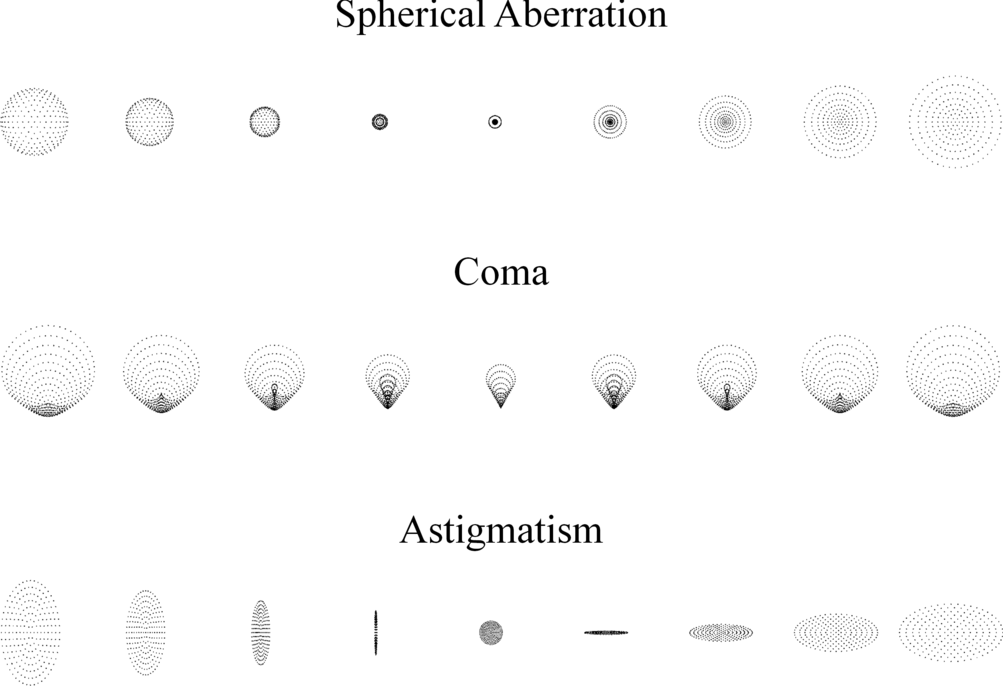

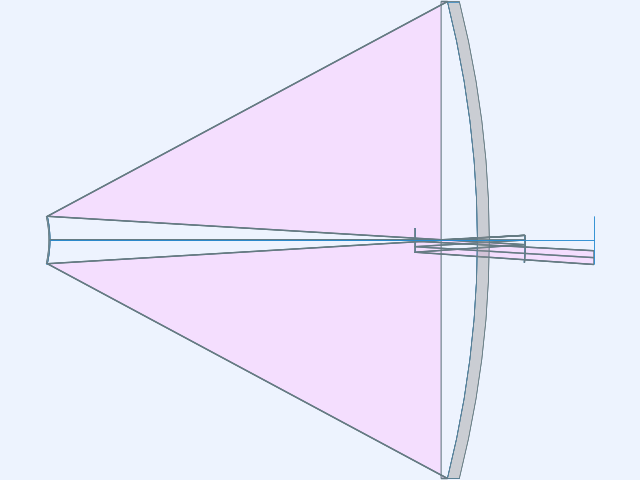

In [27]:
plt.ion()
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

### Spot diagram 1:

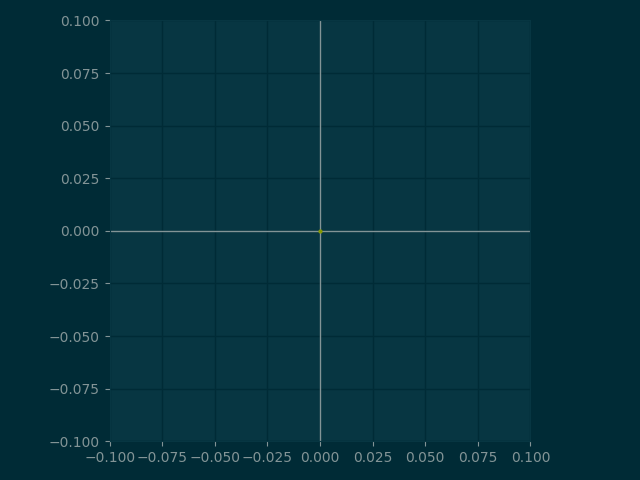

In [28]:
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm, scale_type=Fit.User_Scale,
                      user_scale_value=0.1, is_dark=isdark).plot()

#### Adjusting the mirrors to experiment with different focus

Tilt fine steering mirror by 3 milliradians about the y axis and replot spot diagram

In [29]:
fs_mirror_perturb.euler[0] -= 3
print(fs_mirror_perturb)

'dec and return': Decenter: array([0., 0., 0.]), Tilt: array([-3.,  0.,  0.])


In [30]:
opm.update_model()

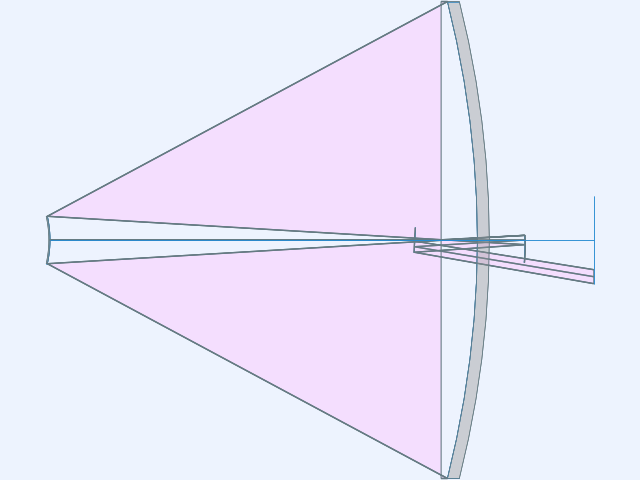

In [31]:
plt.ion()
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

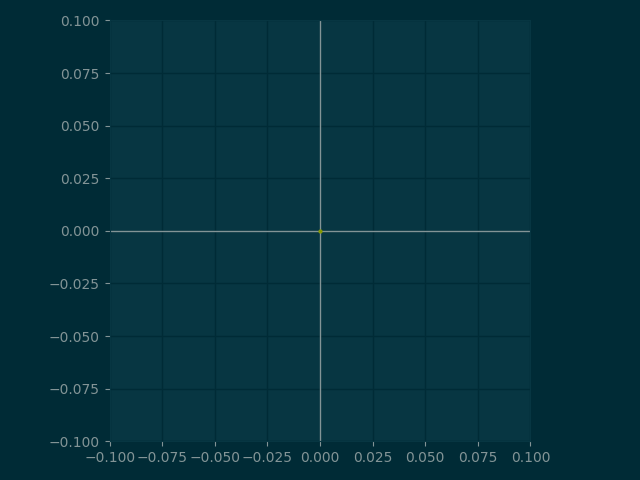

In [32]:
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm, scale_type=Fit.User_Scale,
                      user_scale_value=0.1, is_dark=isdark).plot()

Programmed using the ray-optics ray tracing algorithim by Michael Hayford.

### Future Plans

#### 1. Achieve proper focus!
#### 2. Add y-y diagrams, aberration plots, more data analysis
#### 3. Publish online
 - Already open source. Published on GitHub
 
#### 4. More interactivity. Ability for users to alter angles/tilt as well as object distance
#### 5. Actual image projection. Take a real image and output the resulting image after processing.